<a href="https://colab.research.google.com/github/neerajthandayan/Tensorflow-2.0/blob/main/CNN_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing Libraries

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input

In [2]:
# Fetching Dataset

data = tf.keras.datasets.cifar10

(J_train,k_train), (J_test,k_test) = data.load_data()
J_train, J_test = J_train/255, J_test/255
k_train, k_test = k_train.flatten(), k_test.flatten()

In [3]:
# Checking Shape of Data

J_train.shape

(50000, 32, 32, 3)

In [4]:
# Finding number of classes

print(f'Number of classes: {len(set(k_train))}')

Number of classes: 10


In [5]:
# Constructing Model

i = Input(shape=J_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(10, activation='softmax')(x)

clf = Model(i,x)

In [6]:
# Compiling Data

clf.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

result = clf.fit(J_train,k_train, validation_data=(J_test,k_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 14s 8ms/step - loss: 1.7969 - accuracy: 0.3307 - val_loss: 1.3301 - val_accuracy: 0.5108
Epoch 2/15
1563/1563 [==============================] - 12s 7ms/step - loss: 1.3532 - accuracy: 0.5115 - val_loss: 1.1626 - val_accuracy: 0.5888
Epoch 3/15
1563/1563 [==============================] - 12s 7ms/step - loss: 1.1977 - accuracy: 0.5720 - val_loss: 1.0563 - val_accuracy: 0.6244
Epoch 4/15
1563/1563 [==============================] - 12s 7ms/step - loss: 1.1154 - accuracy: 0.5973 - val_loss: 1.0212 - val_accuracy: 0.6411
Epoch 5/15
1563/1563 [==============================] - 12s 7ms/step - loss: 1.0513 - accuracy: 0.6240 - val_loss: 0.9886 - val_accuracy: 0.6478
Epoch 6/15
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0030 - accuracy: 0.6421 - val_loss: 0.9606 - val_accuracy: 0.6578
Epoch 7/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9421 - accuracy: 0.6646 - val_loss: 0.9373 - val_ac

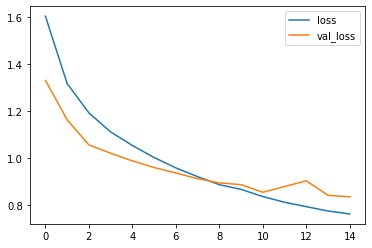

In [7]:
# Checking Loss
import matplotlib.pyplot as plt

plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label='val_loss')
plt.legend()

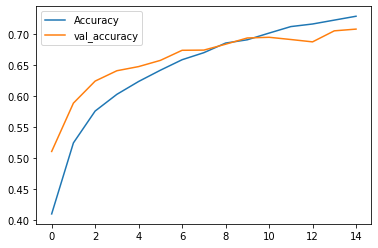

In [8]:
# Checking Accuracy

plt.plot(result.history['accuracy'], label='Accuracy')
plt.plot(result.history['val_accuracy'], label='val_accuracy')
plt.legend()

Confusion matrix, without normalization
[[785  32  29  17  23   4  16   8  49  37]
 [ 18 860   7   4   4   3   9   2  10  83]
 [ 87   8 522  55 146  55  78  27  12  10]
 [ 28  12  61 516 115  96  99  40   8  25]
 [ 24   3  38  45 764  13  52  53   5   3]
 [ 14   3  48 254  94 479  44  51   5   8]
 [  2   5  29  52  55  15 827   8   3   4]
 [ 16   3  24  39  93  36   8 766   0  15]
 [ 86  50  12   9  10   6   8   6 781  32]
 [ 45  89   7  15   9   5   8  19  20 783]]


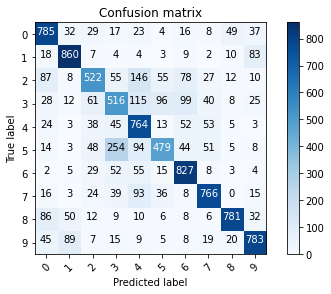

In [10]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = clf.predict(J_test).argmax(axis=1)
cm = confusion_matrix(k_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [11]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

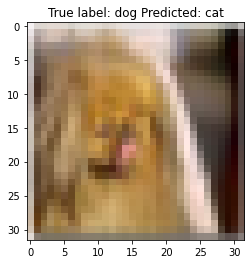

In [21]:
# Show some misclassified examples
# TODO: add label names
misclassified_idx = np.where(p_test != k_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(J_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[k_test[i]], labels[p_test[i]]));